# OPEN CV

* 영상 처리와 컴퓨터 비전을 위한 오픈소스 라이브러리 
* C, C++, Python 등에서 사용 가능
* 파이썬 버전 2.7과 3.x에 따른 지원에 차이가 없음 
* Numpy 모듈이 파이썬 3.0 ~ 3.3까지의 버전을 지원하지 않아 파이썬 3.4버전 이상이 필요
* 설치 명령어 : 
    - pip install opencv-python / pip3 install opencv-python  
    - pip3 install opencv-contrib-python (엑스트라 모듈 포함) 

# 기본입출력

## 이미지, 비디오 입출력

1. img를 출력해보면 이미지의 화소데이터가 출력된다. 

2. img = cv2.imread(file_name [, mode_flag]) : 파일으로부터 이미지 읽기 
    * file_name : 이미지경로, 문자열 
    * mode_flag = cv2.IMREAD_COLOR : 읽기모드지정
        * cv2.IMREAD_COLOR : **컬러(BGR)스케일**로 읽기, 기본 값 
        * cv2.IMREAD_UNCHANGED : 파일 그대로 읽기 
        * **cv2.IMREAD_GRAYSCALE : 그레이(흑백) 스케일로 읽기** 
        
3. cv2.imshow(title, image) : 특정한 이미지를 화면에 출력
    * title : 윈도우 창의 제목
    * image : 출력할 이미지 객체

4. cv2.waitKey(time)
    * time : 입력 대기 시간 (무한대기 : 0) 
    * 사용자가 어떤키를 입력했을 때 대기하며 입력했을 때 Ascii Code(esc:27) 반환
    * ()의 경우 아무키나 입력해도 창 닫힘

5. cv2.destoryAllWindow() : 화면의 모든 윈도우를 닫는 함수 


### 새창에 이미지 띄우기

In [2]:
import cv2

img_file = "img/girl.jpg" # 표시할 이미지 경로            ---①
img = cv2.imread(img_file)  # 이미지를 읽어서 img 변수에 할당 ---②


cv2.imshow('IMG', img)   # 읽은 이미지를 화면에 표시      --- ③
cv2.waitKey()           # 키가 입력될 때 까지 대기      --- ④
cv2.destroyAllWindows()  # 창 모두 닫기            --- ⑤

### jupyter notebook에 이미지 바로 나타내기

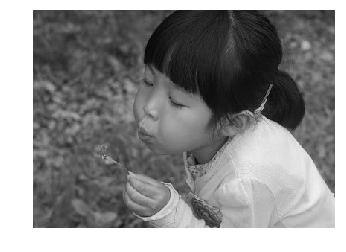

In [5]:
%matplotlib inline

import matplotlib.pyplot as plt
import cv2
img = cv2.imread("img/girl.jpg")
plt.axis('off') #axis 출력 끄기 
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

#### 그레이스케일로 읽기

In [6]:
import cv2

img_file = "img/girl.jpg" 
img = cv2.imread(img_file, cv2.IMREAD_GRAYSCALE)  #그레이 스케일로 읽기

cv2.imshow('IMG', img)
cv2.waitKey()
cv2.destroyAllWindows()

### 이미지 저장하기 

* cv2.imwrite(file_path, img): 이미지를 파일에 저장 
    * file_path : 저장할 파일 경로 이름, 문자열 
    * img : 저장할 영상, Numpy 배열 

경로에 파일로 저장 

In [8]:
import cv2

img_file = 'img/girl.jpg'

img = cv2.imread(img_file, cv2.IMREAD_GRAYSCALE)
cv2.imwrite('img/girl_gray.jpg', img) #파일로 저장, 포맷은 확장에 따름

cv2.imshow(img_file, img)
cv2.waitKey()
cv2.destroyAllWindows()

### 예제) 
(1) 컬러이미지를 윈도우 이미지로 연다. 

(2) 저장한다. , 아무키나 누르면 닫힌다. 

(3) 흑백사진으로 연댜, 아무키나 누르면 닫힌다.

In [5]:
import cv2

#컬리이미지로 열기
img = cv2.imread('img/model3.jpg', cv2.IMREAD_COLOR) 
cv2.imshow('model3', img)
cv2.waitKey(0)
#이미지 저장하기
cv2.imwrite('save image.jpg', img)

cv2.destroyAllWindows() 

#흑백사진으로 열기
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2.imshow('gray image', img_gray)
cv2.waitKey(0)

cv2.destroyAllWindows() 

### 동영상 및 카메라 프레임 읽기
* cap = cv2.VideoCaputure(file_path 또는 index) : 비디오 갭처 객체 생성
    * file_path : 동영상 파일 경로 
    * index : 카메라 장치 번호 (0 부터 차례로 증가)
    * cap : VideoCapture 객체 
* ret = cap.isOpend() : 객체 초기화 확인 
    * ret : 초기화 여부, True/False
* ret, img = cap.read() : 영상 프레임 읽기
    * ret : 프레임 읽기 성송 또는 실패 여부, True / False
    * img : 프레임 이미지, Numpy 배열 또는 None
* cap.set(id, value) : 프로퍼티 변경
* cap.get(id) : 프로퍼티 확인 
* cap.release() : 객체 자원 반납 

### 동영상 파일 읽기
* waitKey(value) : value 값 변경해보기

In [14]:
import cv2

video_file = "img/big_buck.avi" # 동영상 파일 경로

cap = cv2.VideoCapture(video_file) # 동영상 캡쳐 객체 생성  ---①
if cap.isOpened():                 # 캡쳐 객체 초기화 확인
    while True:
        ret, img = cap.read()      # 다음 프레임 읽기      --- ②
        if ret:                     # 프레임 읽기 정상
            cv2.imshow(video_file, img) # 화면에 표시  --- ③
            cv2.waitKey(25)            # 25ms 지연(40fps로 가정)   --- ④
        else:                       # 다음 프레임 읽을 수 없슴,
            break                   # 재생 완료
else:
    print("can't open video.")      # 캡쳐 객체 초기화 실패
cap.release()                       # 캡쳐 자원 반납
cv2.destroyAllWindows()

#### 카메라 프레임 읽기(실습x, 웹캠필요)
* 촬영한 프레임을 읽어 화면에 표시한다.
* 아무 키 입력 시 중지

In [7]:
import cv2

cap = cv2.VideoCapture(0)               # 0번 카메라 장치 연결 ---①
if cap.isOpened():                      # 캡쳐 객체 연결 확인
    while True:
        ret, img = cap.read()           # 다음 프레임 읽기
        if ret:
            cv2.imshow('camera', img)   # 다음 프레임 이미지 표시
            if cv2.waitKey(1) != -1:    # 1ms 동안 키 입력 대기 ---②
                break                   # 아무 키라도 입력이 있으면 중지
        else:
            print('no frame')
            break
else:
    print("can't open camera.")
cap.release()                           # 자원 반납
cv2.destroyAllWindows()

#### 프레임 스트림 프로퍼티 얻기
* cv2.CAP_PROP_FRAME_WIDTH : 프레임 폭
* cv2.CAP_PROP_FRAME_HEIGHT : 프레임 높이
* cv2.CAP_PROP_FPS : 프레임 초당 프레임 수 
* cv2.CAP_PROP_POS_MSEC : 동영상 파일의 프레임 위치(MS)
* cv2.CAP_PROP_POS_AVI_RATIO : 동영상 파일의 상대 위치 (0:시작 , 1:끝)


In [15]:
import cv2

def print_capture_properties(*args):
    capture = cv2.VideoCapture(*args)
    print('Frame count:', int(capture.get(cv2.CAP_PROP_FRAME_COUNT)))
    print('Frame width:', int(capture.get(cv2.CAP_PROP_FRAME_WIDTH)))
    print('Frame height:', int(capture.get(cv2.CAP_PROP_FRAME_HEIGHT)))
    print('Frame rate:', capture.get(cv2.CAP_PROP_FPS))
    
print_capture_properties("img/big_buck.avi")
print_capture_properties(0)

Created capture: img/big_buck.avi
Frame count: 558
Frame width: 852
Frame height: 480
Frame rate: 24.0
Created capture: 0
Frame count: -1
Frame width: 640
Frame height: 480
Frame rate: 30.0


### 프레임 스트림을 비디오로 저장(실습x_웹캠필요)

In [11]:
import cv2

capture = cv2.VideoCapture(0)
frame_width = int(capture.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(capture.get(cv2.CAP_PROP_FRAME_HEIGHT))
print('Frame width:', frame_width)
print('Frame height:', frame_height)

video = cv2.VideoWriter('data/captured_video.avi', cv2.VideoWriter_fourcc(*'X264'),
                        25, (frame_width, frame_height))

while True:
    has_frame, frame = capture.read()
    if not has_frame:
        print('Can\'t get frame')
        break
        
    video.write(frame)
        
    cv2.imshow('frame', frame)
    key = cv2.waitKey(3)
    if key == 27:
        print('Pressed Esc')
        break            

capture.release()
video.release()
cv2.destroyAllWindows()

Frame width: 640
Frame height: 480
Pressed Esc


### 비디오 파일의 프레임 간 이동
* cap.set(id, value) : 프로퍼티 변경
* cap.get(id) : 프로퍼티 확인 
* cv2.CAP_PROP_POS_FRAMES : 현재프레임의 개수

In [16]:
import cv2

capture = cv2.VideoCapture('img/big_buck.avi')
frame_count = int(capture.get(cv2.CAP_PROP_FRAME_COUNT))
print('Frame count:', frame_count)

#첫번째 프레임을 가져온다. 
print('Position:', int(capture.get(cv2.CAP_PROP_POS_FRAMES)))
cature, frame = capture.read()
cv2.imshow('frame0', frame)

# 100번째 프레임으로 이동한다. 
capture.set(cv2.CAP_PROP_POS_FRAMES, 100)
print('Position:', int(capture.get(cv2.CAP_PROP_POS_FRAMES)))
cature, frame = capture.read()
cv2.imshow('frame100', frame)
    
cv2.waitKey()
cv2.destroyAllWindows()

Frame count: 558
Position: 0
Position: 100


### 카메라로 사진 찍기 (웹캠필요)
* 카메라 프레임 읽기 
* 아무 키 누르면 'photo.jpg'에 저장

In [13]:
import cv2

cap = cv2.VideoCapture(0)                       # 0번 카메라 연결
if cap.isOpened() :
    while True:
        ret, frame = cap.read()                 # 카메라 프레임 읽기
        if ret:
            cv2.imshow('camera',frame)          # 프레임 화면에 표시
            if cv2.waitKey(1) != -1:            # 아무 키나 누르면
                cv2.imwrite('photo.jpg', frame) # 프레임을 'photo.jpg'에 저장
                break
        else:
            print('no frame!')
            break
else:
    print('no camera!')
cap.release()
cv2.destroyAllWindows()

### 카메라 녹화하기(웹켐필요)
    * 레코드 파일 저장하기
* writer = cv2.VideoWriter(file_path, fourcc, fps, (width, height)) : 비디오 저장 클래스 생성자 함수
    - file_path : 비디오 파일 저장 경로
    - fourcc : 비디오 인코딩 형싱 4글자
    - fps : 초당 프레임 수 
    - (width, height) : 프레임 폭과 프레임 높이 
    - writer : 생성된 비디오 저장 객체 
* writer.writh(frame) : 프레임 저장 
    - frame : 저장할 프레임 
* writer.set(id, value) : 프로퍼티 변경
* writer.get(id) : 프로퍼티 확인 
* ret = writer.fourcc(c1, c2, c3, c4) : fourcc코드 생성
    - c1, c2, c3, c4 : 인코딩 형식
    - ret : fourcc 코드
* cv2.VideoWriter_fourcc(c1, c2, c3, c4) : cv.VideoWriter.fourcc()

In [26]:
import cv2

cap = cv2.VideoCapture(0)    # 0번 카메라 연결
if cap.isOpened:
    file_path = 'record.avi'    # 저장할 파일 경로 이름 ---①
    fps = 30.0                     # FPS, 초당 프레임 수
    fourcc = cv2.VideoWriter_fourcc(*'DIVX') # 인코딩 포맷 문자
    width = cap.get(cv2.CAP_PROP_FRAME_WIDTH)
    height = cap.get(cv2.CAP_PROP_FRAME_HEIGHT)
    size = (int(width), int(height))                        # 프레임 크기
    out = cv2.VideoWriter(file_path, fourcc, fps, size) # VideoWriter 객체 생성
    while True:
        ret, frame = cap.read()
        if ret:
            cv2.imshow('camera-recording',frame)
            out.write(frame)                        # 파일 저장
            if cv2.waitKey(int(1000/fps)) != -1: 
                break
        else:
            print("no frame!")
            break
    out.release()                                   # 파일 닫기
else:
    print("can't open camera!")
cap.release()
cv2.destroyAllWindows()

## 그림그리기

### 직선그리기
* cv2.line(img, start, end, color[, thickness, lineType]):
    * img : 그림그릴 대상 이미지, Numpy 배열 
    * start : 선 시작 지점 좌표 (x,y) 
    * end : 선 끝 지점 좌표 (x,y)
    * color : 선 색상 ,(BGR), (0 ~ 255)
    * thickness=1 : 선 두께
    * lineType: 선그리기 형식 
        * cv2.LINE_4,LINE_8, LINE_AA 

#### 간단한 선그려보기

<function matplotlib.pyplot.show(*args, **kw)>

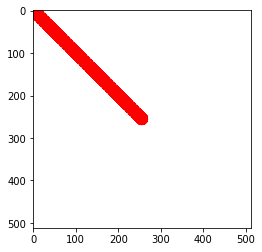

In [18]:
import cv2
import matplotlib.pyplot as plt 
import numpy as np 

#512행, 512열, 3채널 , 255 값을 가지는 numpy 행렬 만들기 
image = np.full((512, 512, 3), 255, np.uint8)
image = cv2.line(image, (0,0), (255, 255), (255, 0 ,0),30,cv2.LINE_AA )

plt.imshow(image)
plt.show


### 사각형 그리기 

* cv2.rectangle(img, start, end, color[, thickness, lineType]: 사각형 그리기 
    * img : 그림 그릴 대상 이미지, NumPy 배열
    * start : d사각형 시작 꼭짓점 (x,y)
    * end : 사각형 끝 꼭짓점( x, y)
    * color : 색상 (BGR)
    * thickness : 선 두께 
        * -1 : 채우기 
    * lineType : 선타입, cv2.line()과 동일 

#### 간단한 사각형 그리기

<function matplotlib.pyplot.show(*args, **kw)>

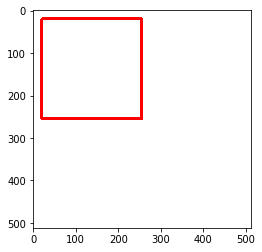

In [15]:
import cv2
import matplotlib.pyplot as plt 
import numpy as np 

image = np.full((512, 512, 3), 255, np.uint8)

image = cv2.rectangle(image, (20,20), (255, 255), (255, 0, 0), 5) 
#image = cv2.rectangle(image, (20,20), (255, 255), (255, 0, 0), -1) 


plt.imshow(image)
plt.show


#### 간단한사각형그리기_2

In [16]:
import cv2

img = cv2.imread('img/blank_500.jpg')

# 좌상, 우하 좌표로 사각형 그리기
cv2.rectangle(img, (50, 50), (150, 150), (255,0,0) )        
# 우하, 좌상 좌표로 사각형 그리기
cv2.rectangle(img, (300, 300), (100, 100), (0,255,0), 10 )  
# 우상, 좌하 좌표로 사각형 채워 그리기 ---①
cv2.rectangle(img, (450, 200), (200, 450), (0,0,255), -1 )  

cv2.imshow('rectangle', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

### 다각형 그리기

* cv2.polylines(img, points, isClosed, color[, thickness, lineType]): 다각형 그리기 

    *img : 그림 그릴 대상 이미지 
    * points : 꼭짓점 좌표, Numpy 배열 리스트 
    * isClosed: 닫힌 도형 여부, True/False 
    * color : 색상(BGR)
    * thickness : 선 두께
    * lineType : 선 타입, cv2.line()과 동일

#### 다각형그리기_1

<function matplotlib.pyplot.show(*args, **kw)>

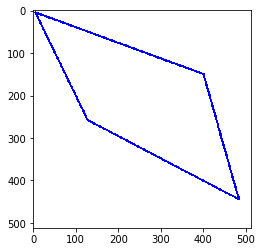

In [18]:
import cv2
import matplotlib.pyplot as plt 
import numpy as np 

image = np.full((512, 512, 3), 255, np.uint8)
points = np.array([[5, 5], [128, 258] , [483, 444], [400, 150]])
image = cv2.polylines(image, [points], True, (0, 0, 255), 4)

plt.imshow(image)
plt.show


#### 다각형그리기_2

In [21]:
import cv2
import numpy as np                          # 좌표 표현을 위한 numpy 모듈  ---①

img = cv2.imread('img/blank_500.jpg')

# Numpy array로 좌표 생성 ---②
# 번개 모양 선 좌표
pts1 = np.array([[50,50], [150,150], [100,140],[200,240]], dtype=np.int32) 
# 삼각형 좌표
pts2 = np.array([[350,50], [250,200], [450,200]], dtype=np.int32) 
# 삼각형 좌표
pts3 = np.array([[150,300], [50,450], [250,450]], dtype=np.int32) 
# 5각형 좌표
pts4 = np.array([[350,250], [450,350], [400,450], [300,450], [250,350]],dtype=np.int32) 

# 다각형 그리기 ---③
cv2.polylines(img, [pts1], False, (255,0,0))       # 번개 모양 선 그리기
cv2.polylines(img, [pts2], False, (0,0,0), 10)     # 3각형 열린 선 그리기 ---④
cv2.polylines(img, [pts3], True, (0,0,255), 10)    # 3각형 닫힌 도형 그리기 ---⑤
cv2.polylines(img, [pts4], True, (0,0,0))          # 5각형 닫힌 도형 그리기

cv2.imshow('polyline', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

### 원그리기

* cv2.circle(img, center, radius, color[, thickness, lineType]) : 원 그리기
    * img : 그림 대상 이미지
    * center : 원점 좌표 (x,y)
    * radius : 원의 반지름 
    * color : 색상 (BGR)
    * thickness : 선 두께 (-1 : 채우기)
    * lineType : 선 타입, cv2.line()과 동일

#### 간단한 원 그리기

<function matplotlib.pyplot.show(*args, **kw)>

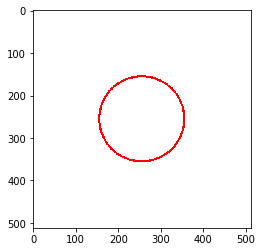

In [21]:
import cv2
import matplotlib.pyplot as plt 
import numpy as np 

image = np.full((512, 512, 3), 255, np.uint8)

image = cv2.circle(image, (255,255),100, (255, 0, 0), 3) 
# image = cv2.circle(image, (255,255),100, (255, 0, 0), -1)

plt.imshow(image)
plt.show

### 텍스트 
* cv2.putText(image, text, position, font_type, font_scale, color) : 하나의 텍스트를 그리는 함수 
     - position : 텍스트가 출력될 위치 
     - font_type : 글씨체 
     - font_scale: 글씨 크기 가중치

In [23]:
import cv2
import matplotlib.pyplot as plt 
import numpy as np 

image = np.full((512, 512, 3), 255, np.uint8)
image = cv2.putText(image, 'Hello World', (0, 200), cv2.FONT_ITALIC, 2, (255, 0, 0))

cv2.imshow('text', image)
cv2.waitKey(0)
cv2.destroyAllWindows()

### 창관리
* cv2.nameWindow(title [, option]) : 이름을 갖는 창 열기 
    * title : 창이름, 제목 줄에 표시
    * option : 창옵션 
        * cv2.WINDOW_NORMAL:임의의크기, 창 크기 조정 가능 
        * cv2.WINDOW_AUTOSIZE : 이미지와 같은 크기, 창 크기 재조정 불가능 
            
* cv2.moveWindow(title, x좌표 , y좌표) : 창위치 이동 
* cv2.resizeWindow(title, width, height) : 창 크기 변경 
* cv2.destroyWindow(title) : 창 닫기 
* cv2.destroyAllWindows(): 열린 모든 창 닫기

In [24]:
import cv2

file_path = 'img/girl.jpg'
img = cv2.imread(file_path)                            # 이미지를 기본 값으로 읽기
img_gray = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE) # 이미지를 그레이 스케일로 읽기

cv2.namedWindow('origin')                               # origin 이름으로 창 생성
cv2.namedWindow('gray', cv2.WINDOW_NORMAL)              # gray 이름으로 창 생성
cv2.imshow('origin', img)                               # origin 창에 이미지 표시
cv2.imshow('gray', img_gray)                            # gray 창에 이미지 표시

cv2.moveWindow('origin', 0, 0)                          # 창 위치 변경
cv2.moveWindow('gray', 100, 100)                        # 창 위치 변경

cv2.waitKey(0)                                          # 아무키나 누르면
cv2.resizeWindow('origin', 200, 200)                    # 창 크기 변경 (변경 안됨)
cv2.resizeWindow('gray', 100, 100)                      # 창 크기 변경 (변경 됨))

cv2.waitKey(0)                                          # 아무키나 누르면
cv2.destroyWindow("gray")                               # gray 창 닫기

cv2.waitKey(0)                                          # 아무키나 누르면
cv2.destroyAllWindows()                                 # 모든 창 닫기

### 사용자의 키보드입력 처리하기
* 윈도우 wasd 키로 상하좌우 움직이기 
* q, esc누르면 종료

* cv2.waitKey(delay) :   
밀리초(0.001초) 단위로 숫자를 전달하면 해당 시간 동안 프로그램을 멈추고 대기하다가 키보드의 눌린 키에 대응하는 코드 값을 정수로 반환
    - 0 : 무한대
    - ex) esc를 누를 경우 27 출력 (ASCII코드 출력)
* ord() : 문자의 아스키코드 출력

In [16]:
import cv2

img_file = "img/actor.jpg" 
img = cv2.imread(img_file)
title = 'IMG'                   # 창 이름 
x, y = 100, 100                 # 최초 좌표

while True:
    cv2.imshow(title, img)
    cv2.moveWindow(title, x, y)
    key = cv2.waitKey(0)  # 키보드 입력을 무한 대기, 8비트 마스크처리
    if key == ord('a'):         # 'a' 키 이면 좌로 이동
        x -= 10
        
    elif key == ord('s'):       # 's' 키 이면 아래로 이동
        y += 10
      
    elif key == ord('w'):       # 'w' 키 이면 위로 이동
        y -= 10
        
    elif key == ord('d'):       # 's' 키 이면 오른쪽으로 이동
        x += 10
        
    elif key == ord('q') or key == 27: # 'q' 이거나 'esc' 이면 종료
        break
cv2.destroyAllWindows()

### 사용자의 마우스입력 처리하기
* cv2.setMouseCallback(win_name, onMouse [, param]) : win_name에 onMouse 함수를 등록 
    - win_name : 이벤트를 등록할 윈도 이름
    - onMoouse : 이벤트 처리를 위해 미리 선언해 놓은 콜백 함수
    - param : 필요에 따라 onMouse 함수에 ㅓㄴ달할 인자 
* **MouseCallback(event, x, y, flags, param) : 콜백 함수 선언부**
    - event : 마우스 이벤트 종류
        - cv2.EVENT_MOSEMOVE : 마우스 움직임
        - cv2.EVENT_LBUTTONDOWN : 왼쪽 버튼 누름
        - cv2.EVENT_RBUTTONDOWN : 오른쪽 버튼 누름 
        - cv2.EVENT_MBUTTONDOWN : 가운데 버튼 누름
        - cv2.EVENT_LBUTTONDUP : 왼쪽 버튼 뗌
        - cv2.EVENT_RBUTTONUP : 오른쪽 버튼 뗌 
        - cv2.EVENT_MBUTTONUP : 가운데 버튼 뗌
        - cv2.EVENT_LBUTTONDBLCLK: 왼쪽 버튼 더블클릭
        - cv2.EVENT_RBUTTONDBLCLK : 오른쪽 버튼 더블클릭
        - cv2.EVENT_MBUTTONDBLCLK : 가운데 버튼 더블클릭
        - cv2.EVENT_MOUSEWHEEL : 휠 스크롤
        - cv2.EVENT_MOUSEWHEEL : 휠 가로 스크롤 
    - x, y : 마우스 좌표 
    - flags : 마우스 동작과 함께 일어난 상태
        - cv2.EVENT_LBUTTONDOWN(1) : 왼쪽 버튼 누름
        - cv2.EVENT_RBUTTONDOWN(2) : 오른쪽 버튼 누름 
        - cv2.EVENT_MBUTTONDOWN(4) : 가운데 버튼 누름
        - cv2.EVENT_FLAG_CTRLKEY(8) : Ctrl 키 누름
        - cv2.EVENT_FLAG_SHIFTKEY(16) : Shift 키 누름
        - cv2.EVENT_FLAG_ALTKEY(32) : Alt 키 누름
    - param : cv2.setMouseCallback() 함수에서 전달한 인자
        

    

#### 마우스 이벤트로 동그라미그리기

In [25]:
import cv2

window = 'mouse event'                   # 창 제목
img = cv2.imread('img/blank_500.jpg') # 백색 이미지 읽기
cv2.imshow(window, img)                  # 백색 이미지 표시

def onMouse(event, x, y, flags, param): # 아무스 콜백 함수 구현 ---①
    if event == cv2.EVENT_LBUTTONDOWN:  # 왼쪽 버튼 누름인 경우 ---②
        cv2.circle(img, (x,y), 30, (0,0,0), -1) # 지름 30 크기의 검은색 원을 해당 좌표에 그림
        cv2.imshow(window, img)          # 그려진 이미지를 다시 표시 ---③

cv2.setMouseCallback(window, onMouse)    # 마우스 콜백 함수를 GUI 윈도우에 등록 ---④

while True:
    if cv2.waitKey(0)  :     # esc로 종료 #13 enter # 32 스페이스 
        break
cv2.destroyAllWindows()

In [6]:
print(ord('q'))

113


#### 플래그 이용한 동그라미 그리기

In [36]:
import cv2
title = 'mouse event'                   # 창 제목
img = cv2.imread('img/blank_500.jpg') # 백색 이미지 읽기
cv2.imshow(title, img)                  # 백색 이미지 표시

colors = {'black':(0,0,0),
         'red' : (0,0,255),
         'blue':(255,0,0),
         'green': (0,255,0) } # 색상 미리 정의

def onMouse(event, x, y, flags, param): # 아무스 콜백 함수 구현 ---①
    color = colors['black']
    if event == cv2.EVENT_LBUTTONDOWN:  # 왼쪽 버튼 누름인 경우 ---②
        #컨트롤과 쉬프트 파란원 
        if flags & cv2.EVENT_FLAG_SHIFTKEY :
            color = colors['blue']
        if flags & cv2.EVENT_FLAG_CTRLKEY and flags & cv2.EVENT_FLAG_SHIFTKEY : 
            color = colors['green']
    

#컨트롤과 왼쪽버튼 빨간원 
#컨트롤과 스프트 같이 누른경우 녹색원 (and)
        
        # 지름 30 크기의 검은색 원을 해당 좌표에 그림
        cv2.circle(img, (x,y), 30, color, -1) 
        cv2.imshow(title, img)          # 그려진 이미지를 다시 표시 ---③

cv2.setMouseCallback(title, onMouse)    # 마우스 콜백 함수를 GUI 윈도우에 등록 ---④

while True:
    if cv2.waitKey(0) == 27:     # esc로 종료
        break
cv2.destroyAllWindows()

KeyboardInterrupt: 

In [35]:
import cv2

title = 'mouse event'                   # 창 제목
img = cv2.imread('img/blank_500.jpg') # 백색 이미지 읽기
cv2.imshow(title, img)                  # 백색 이미지 표시

colors = {'black':(0,0,0),
         'red' : (0,0,255),
         'blue':(255,0,0),
         'green': (0,255,0) } # 색상 미리 정의

def onMouse(event, x, y, flags, param): # 아무스 콜백 함수 구현 ---①
    color = colors['black']
    if event == cv2.EVENT_LBUTTONDOWN:  # 왼쪽 버튼 누름인 경우 ---②
        # 컨트롤키와 쉬프트 키를 모두 누른 경우
        if flags & cv2.EVENT_FLAG_CTRLKEY and flags & cv2.EVENT_FLAG_SHIFTKEY : 
            color = colors['green']
        elif flags & cv2.EVENT_FLAG_SHIFTKEY : # 쉬프트 키를 누른 경우
            color = colors['blue']
        elif flags & cv2.EVENT_FLAG_CTRLKEY : # 컨트롤 키를 누른 경우
            color = colors['red']
        # 지름 30 크기의 검은색 원을 해당 좌표에 그림
        cv2.circle(img, (x,y), 30, color, -1) 
        cv2.imshow(title, img)          # 그려진 이미지를 다시 표시 ---③

cv2.setMouseCallback(title, onMouse)    # 마우스 콜백 함수를 GUI 윈도우에 등록 ---④

while True:
    if cv2.waitKey(0) == 27:     # esc로 종료
        break
cv2.destroyAllWindows()

KeyboardInterrupt: 

#### 콜백함수 이용해서 이미지 자르기(p43) 

In [39]:
# 마우스를 눌러 사각형을 만든다
# c를 눌러 이미지를 자른다. 
# esc를 눌러 종료한다.

import cv2, numpy as np 

#이미불러오기, 복사하기
image = cv2.imread('img/actor.jpg')
image_to_show = np.copy(image) 

#마우스 상태를 저장하기 위한 변수를 정의한다.
mouse_pressed = False
s_x = s_y = e_x = e_y = -1

#이벤트 핸들러 구현 
def mouse_callback(event, x, y, flags, param):
    global image_to_show, s_x, s_y, e_x, e_y, mouse_pressed

#마우스 왼쪽 버튼 누름
    if event == cv2.EVENT_LBUTTONDOWN: 
        mouse_pressed = True
        s_x, s_y = x, y
        image_to_show = np.copy(image)

#마우스 움직임
    elif event == cv2.EVENT_MOUSEMOVE:
        if mouse_pressed:
            image_to_show = np.copy(image)
            cv2.rectangle(image_to_show, (s_x, s_y),
                          (x, y), (0, 255, 0), 1)

#마우스 왼쪽 버튼 뗌
    elif event == cv2.EVENT_LBUTTONUP:
        mouse_pressed = False
        e_x, e_y = x, y 


cv2.namedWindow('image')
cv2.setMouseCallback('image', mouse_callback) #mouse_callback함수를 'image'윈도에 등록

while True:
    cv2.imshow('image', image_to_show)
    k = cv2.waitKey(1)

    if k == ord('c'): #s_(start), e_(end)
       
        if s_y > e_y:
            s_y, e_y = e_y, s_y
        if s_x > e_x:
            s_x, e_x = e_x, s_x

        if e_y - s_y > 1 and e_x - s_x > 0:
            image = image[s_y:e_y, s_x:e_x]
            image_to_show = np.copy(image)
    elif k == 27:
        break

cv2.destroyAllWindows()

### 트랙바를 이용한 이미지 색 조정
* cv2.createTrackbar(trackbar_name, win_name, value, count, onChange) : 트랙바 생성
    * trackbar_name : 트랙바 이름 
    * value : 트랙바 초기 값, 0 ~ count 사이의 값 
    * count : 트랙바 눈굼의 개수, 트랙바가 표시할 수 있는 최대 값 
    * onChange : TrackbarCallbak, 트랙바 이벤트 핸들러 함수

* TrackbarCallback(value) : 트랙바 이벤트 콜백 함수 
    * value : 트랙바가 움직인 새 위치 값 

* pos = cv2.getTrackbarPos(trackbar_name, win_name)
    * trackbar_name : 찾고자 하는 트랙바 이름 
    * win_name : 트랙바가 있는 창의 이름 
    * pos : 트랙바 위치 값 

In [ ]:
import cv2
import numpy as np

win_name = 'Trackbar'                                   # 창 이름

img = cv2.imread('img/blank_500.jpg')
cv2.imshow(win_name,img)                                # 초기 이미지를 창에 표시

# 트랙바 이벤트 처리 함수 선언 
def onChange(x):                                        
    # 'R', 'G', 'B' 각 트랙바 위치 값    
    r = cv2.getTrackbarPos('R',win_name)               
    g = cv2.getTrackbarPos('G',win_name)               
    b = cv2.getTrackbarPos('B',win_name)               
    img[:] = [b,g,r]                                    # 기존 이미지에 새로운 픽셀 값 적용(open cv는 bgr사용)
    cv2.imshow(win_name, img)                           # 새 이미지 창에 표시

# 트랙바 생성   
cv2.createTrackbar('R', win_name, 255, 255, onChange)  
cv2.createTrackbar('G', win_name, 255, 255, onChange)
cv2.createTrackbar('B', win_name, 255, 255, onChange)

while True:
    if cv2.waitKey(1) == 27:
        break
cv2.destroyAllWindows()      